<a href="https://colab.research.google.com/github/LadiBamgbose/AI/blob/main/HW5/AiHW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI HW5

In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [2]:
# Loading the needed libraries
library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [3]:
#initializing the sequences
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

In [4]:
#initializing the functions
function1 <- function(x1, x2, x3, x4) {
  # Minimize cross-sectional area
  # Implement the calculation based on the I-beam design

  (2 * x2 * x4) + (x3 * (x1 - (2 *x4)))
}

function2 <- function(x1, x2, x3, x4) {
  # Minimize static deflection
  # Implement the calculation based on the I-beam design

  60000/((x3*((x1 - (2 *x4))^3)) + ((2 * x2 * x4) * ((4*(x4)^2) + ((3*x1)*(x1 - (2 * x4))))))
}

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -41.91969 
Solution = 
           x1       x2      x3       x4
[1,] 11.98729 11.81314 1.86257 0.984492

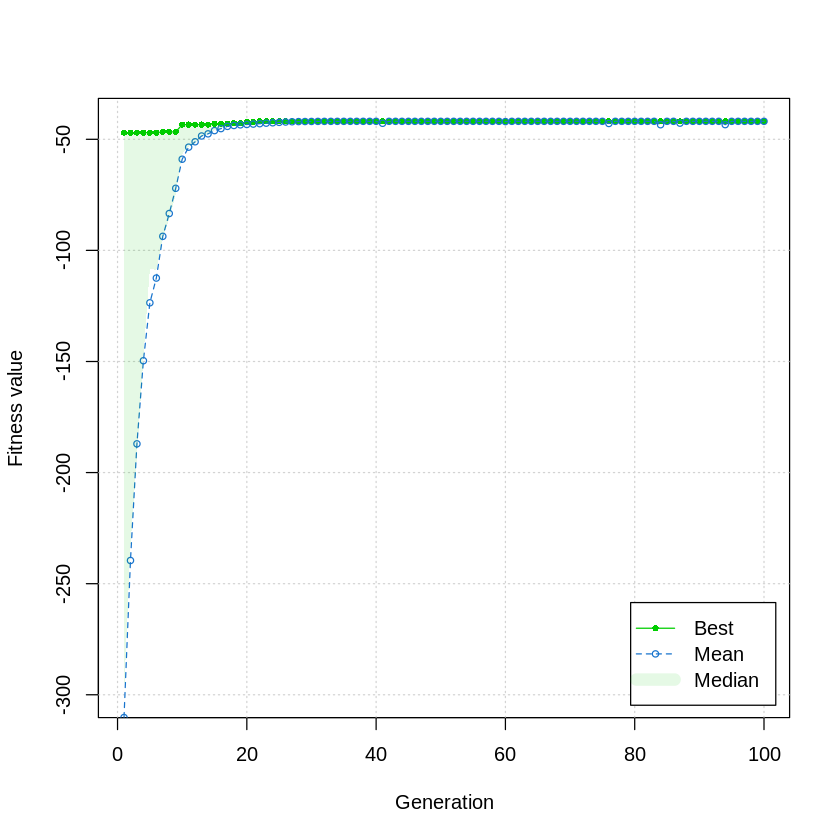

In [6]:
# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness =  function(x)  - function1(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
        popSize = 50, maxiter = 100, run = 100,
        pcrossover = 0.75,
        pmutation = 0.001)

summary(GA)

plot(GA)

>Here we are minimizing the cross sectional area and plotting the best and average fitness values strictl pertaining to the cross sectional area.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.009484445 
Solution = 
           x1      x2       x3       x4
[1,] 77.92071 44.2492 4.027686 3.286366

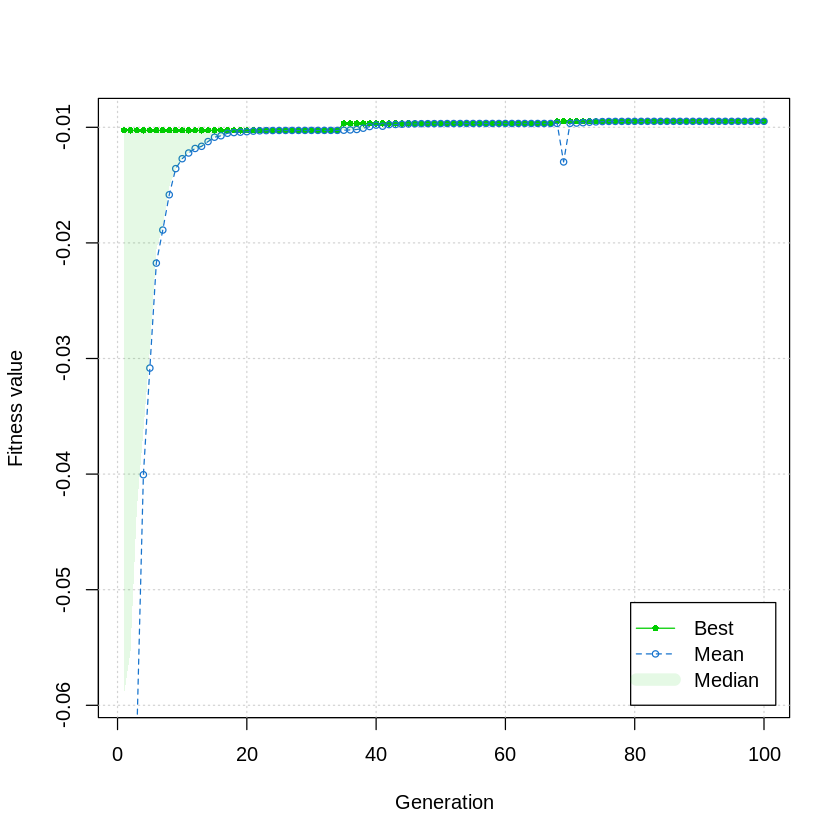

In [ ]:
# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness =  function(x) - function2(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
        popSize = 50, maxiter = 100, run = 100,
        pcrossover = 0.75,
        pmutation = 0.001)

summary(GA)

plot(GA)

Here we are minimizing the static definiton of the beam and plotting its best and average fitness values. These fitness values are strictly just for the static definiton.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4 x5
lower 10 10 0.9 0.9  0
upper 80 50 5.0 5.0  1

GA results: 
Iterations             = 100 
Fitness function value = -0.007543207 
Solution = 
           x1       x2       x3     x4       x5
[1,] 78.01681 45.38892 3.494509 4.6456 0.629926

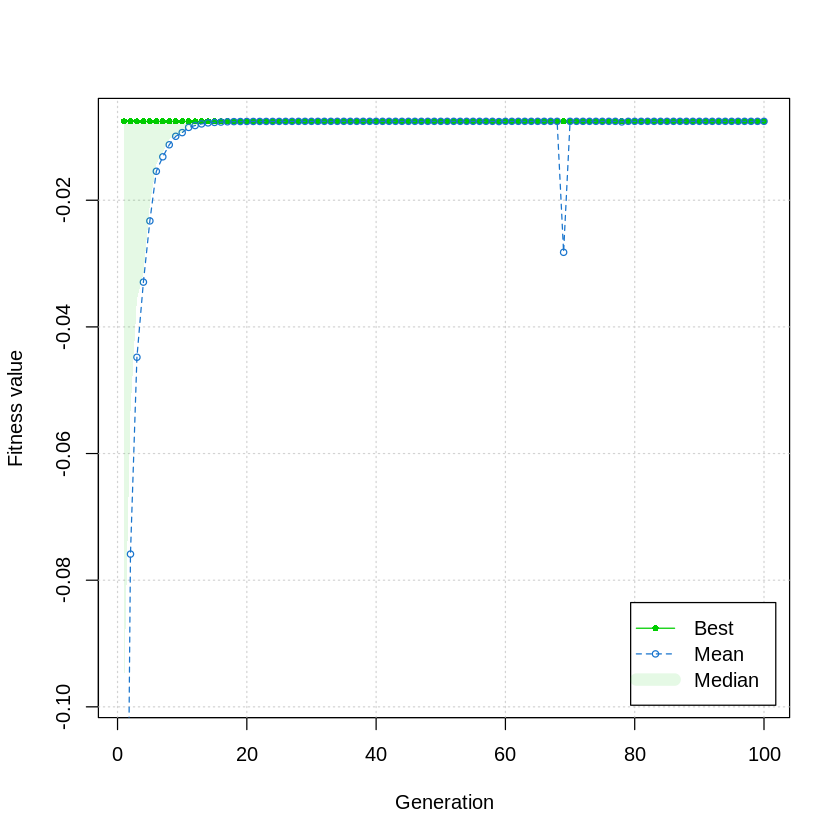

In [15]:
a = 0
function3 <- function(x1, x2, x3, x4, a)  {
  (a * function1(x1, x2, x3, x4)) + ((1-a)* function2(x1, x2, x3, x4))
}
# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness =  function(x) - function3(x[1], x[2], x[3], x[4], a),
        lower = c(10, 10, 0.9, 0.9, 0), upper = c(80, 50, 5, 5, 1),
        popSize = 50, maxiter = 100, run = 100,
        pcrossover = 0.75,
        pmutation = 0.001)

summary(GA)

plot(GA)

>Now we are minimizing the full funciton F = a*f1 + b*f2. This will give us the best and average fitness values for the entire function. When a = 0.63  and b = 0.37 the function is minimized with a fitness value of -0.007543207

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4 x5
lower 10 10 0.9 0.9  0
upper 80 50 5.0 5.0  1

GA results: 
Iterations             = 100 
Fitness function value = -33.62306 
Solution = 
           x1       x2       x3       x4       x5
[1,] 14.67266 15.80524 1.888224 1.337332 0.181111

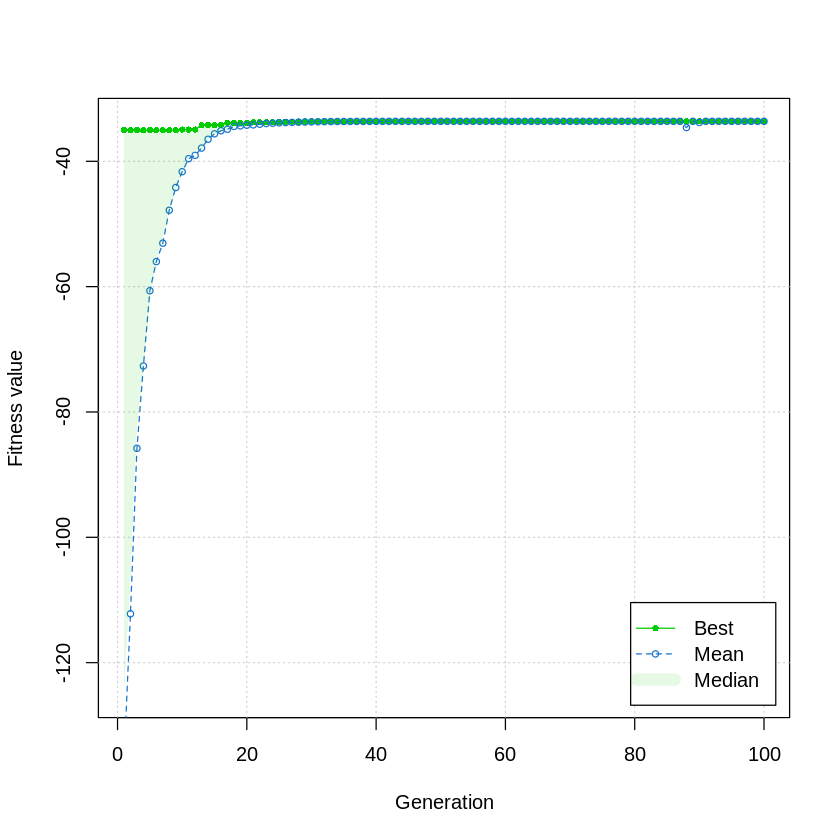

In [18]:
a = .5
function3 <- function(x1, x2, x3, x4, a)  {
  (a * function1(x1, x2, x3, x4)) + ((1-a) * function2(x1, x2, x3, x4))
}
# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness =  function(x) - function3(x[1], x[2], x[3], x[4], a),
        lower = c(10, 10, 0.9, 0.9, 0), upper = c(80, 50, 5, 5, 1),
        popSize = 50, maxiter = 100, run = 100,
        pcrossover = 0.75,
        pmutation = 0.001)

summary(GA)

plot(GA)

>We can similarly do this with different a and b values and see what the graph outputs to see if we get any beter fitness vlaues.

#Summary

In conclusion we have done an analysis on both individual functions and we see what happens to their individual fitness values as we minimize the functions individually. We then looked at what happens when we add weights to the functions and try to minimize the over all function (F). As we can see we have determined the appropriate weights (a and b) to minimize the function and get the fitness value.